In [ ]:
import numpy as np # linear algebra
# import stat
from scipy import stats
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting intuitive plots and graphs
%matplotlib inline 
pd.set_option('display.max_columns', 500) # To display all the columns of dataframe
pd.set_option('max_colwidth', -1) # To set the width of the column to maximum
import warnings # To ignore warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/blob/master/ibm-hr-analytics-employee-attrition-performance.zip'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns

In [2]:
## Functions for summary and plotting
# Get the summary info of data set
def tableSummary(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing %'] = 100* np.round(df.isnull().sum().values/len(df),2)  
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary

# defining function for plotting
def univariate_percent_plot(cat):
    fig = plt.figure(figsize=(18,12))
    cmap=plt.cm.Blues
    cmap1=plt.cm.coolwarm_r
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    
    result = df.groupby(cat).apply (lambda group: (group.Attrition == 0).sum() / float(group.Attrition.count())
         ).to_frame('Loyal')
    result['Left'] = 1 -result.Loyal
    result.plot(kind='bar', stacked = True,colormap=cmap1, ax=ax1)
    ax1.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax1.set_ylabel('% Attrition Rate')
    ax1.legend(loc="lower right")
    loans_by_annual = df.groupby([cat, 'Attrition']).size()
    loans_by_annual.unstack().plot(kind='bar', stacked=True,ax=ax2)
    ax2.set_title('stacked Bar Plot of '+ cat +' (in %)', fontsize=14)
    ax2.set_ylabel('Number of Employees')
    
    
    plt.show()

In [3]:
#importing dataset
df = pd.read_csv('https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics/blob/master/ibm-hr-analytics-employee-attrition-performance.zip')

In [4]:
#Lets see the sample of the dataset.
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Get the data set summary 
df_info = tableSummary(df)
df_info

Dataset Shape: (1470, 35)


,Name,dtypes,Missing %,Uniques,First Value,Second Value,Third Value,Entropy
0,Age,int64,0.0,43,41,49,37,5.14
1,Attrition,object,0.0,2,Yes,No,Yes,0.64
2,BusinessTravel,object,0.0,3,Travel_Rarely,Travel_Frequently,Travel_Rarely,1.14
3,DailyRate,int64,0.0,886,1102,279,1373,9.62
4,Department,object,0.0,3,Sales,Research & Development,Research & Development,1.12
5,DistanceFromHome,int64,0.0,29,1,8,2,4.36
6,Education,int64,0.0,5,2,1,2,2.02
7,EducationField,object,0.0,6,Life Sciences,Life Sciences,Other,2.05
8,EmployeeCount,int64,0.0,1,1,1,1,0.00
9,EmployeeNumber,int64,0.0,1470,1,2,4,10.52


In [6]:
# As per the data description we will convert categorical numerically encoded columns into their categories

# binning worklifebalance
def bin_work_life(n):
    if n ==1:
        return 'Bad'
    elif n ==2:
        return 'Good'
    elif n ==3:
        return 'Better'
    elif n ==4:
        return 'Best'

df['WorkLifeBalance'] = df['WorkLifeBalance'].apply(lambda x: bin_work_life(x))

# binningPerformanceRating
def bin_PerformanceRating(n):
    if n ==1:
        return 'Low'
    elif n ==2:
        return 'Good'
    elif n ==3:
        return 'Excellent'
    elif n ==4:
        return 'Outstanding'

df['PerformanceRating'] = df['PerformanceRating'].apply(lambda x: bin_PerformanceRating(x))

# binning RelationshipSatisfaction
def bin_RelationshipSatisfaction(n):
    if n ==1:
        return 'Low'
    elif n ==2:
        return 'Medium'
    elif n ==3:
        return 'High'
    elif n ==4:
        return 'Very High'

df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].apply(lambda x: bin_RelationshipSatisfaction(x))

# binning JobSatisfaction
def bin_JobSatisfaction(n):
    if n ==1:
        return 'Low'
    elif n ==2:
        return 'Medium'
    elif n ==3:
        return 'High'
    elif n ==4:
        return 'Very High'

df['JobSatisfaction'] = df['JobSatisfaction'].apply(lambda x: bin_JobSatisfaction(x))

# binning JobInvolvement
def bin_JobInvolvement(n):
    if n ==1:
        return 'Low'
    elif n ==2:
        return 'Medium'
    elif n ==3:
        return 'High'
    elif n ==4:
        return 'Very High'

df['JobInvolvement'] = df['JobInvolvement'].apply(lambda x: bin_JobInvolvement(x))

def bin_EnvironmentSatisfaction(n):
    if n ==1:
        return 'Low'
    elif n ==2:
        return 'Medium'
    elif n ==3:
        return 'High'
    elif n ==4:
        return 'Very High'

df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].apply(lambda x: bin_EnvironmentSatisfaction(x))


def bin_Education(n):
    if n ==1:
        return 'Below College'
    elif n ==2:
        return 'College'
    elif n ==3:
        return 'Bachelor'
    elif n ==4:
        return 'Master'
    elif n==5:
        return 'Doctor'

df['Education'] = df['Education'].apply(lambda x: bin_Education(x))

# encoding attrition to binary value 0 and 1 0 for no attrition and 1 for attrition
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x=='No' else 1)

# converting Attrition datatype to integer type
df['Attrition'] = df['Attrition'].apply(lambda x: pd.to_numeric(x))

# segregating dataframes based on class label for plotting in future

attr_1=df[df['Attrition']==1]
attr_0=df[df['Attrition']==0]


In [7]:
# Get the data set summary again
df_info = tableSummary(df)
df_info

Dataset Shape: (1470, 35)


,Name,dtypes,Missing %,Uniques,First Value,Second Value,Third Value,Entropy
0,Age,int64,0.0,43,41,49,37,5.14
1,Attrition,int64,0.0,2,1,0,1,0.64
2,BusinessTravel,object,0.0,3,Travel_Rarely,Travel_Frequently,Travel_Rarely,1.14
3,DailyRate,int64,0.0,886,1102,279,1373,9.62
4,Department,object,0.0,3,Sales,Research & Development,Research & Development,1.12
5,DistanceFromHome,int64,0.0,29,1,8,2,4.36
6,Education,object,0.0,5,College,Below College,College,2.02
7,EducationField,object,0.0,6,Life Sciences,Life Sciences,Other,2.05
8,EmployeeCount,int64,0.0,1,1,1,1,0.00
9,EmployeeNumber,int64,0.0,1470,1,2,4,10.52


### Observations:
Some of the key observations by seeing the summary stats of the dataset are:
- There are no missing values in the dataset which is a good sign for us.
- There are three columns (EmployeeCount,Over18 and StandardHours) which have only 1 unique value which will be of no use in prediction process.
- Employee Number is useless column that we can drop in future.

Next we will proceed towards data cleaning step to deal with the issues observed above.

In [8]:
# dropping columns having 1 unique value and employee number

cols_to_drop = ['EmployeeCount','Over18','StandardHours','EmployeeNumber']
# dropping columns
df = df.drop(cols_to_drop, axis=1)


In [9]:
# Get the data set summary again
df_info = tableSummary(df)
df_info

Dataset Shape: (1470, 31)


,Name,dtypes,Missing %,Uniques,First Value,Second Value,Third Value,Entropy
0,Age,int64,0.0,43,41,49,37,5.14
1,Attrition,int64,0.0,2,1,0,1,0.64
2,BusinessTravel,object,0.0,3,Travel_Rarely,Travel_Frequently,Travel_Rarely,1.14
3,DailyRate,int64,0.0,886,1102,279,1373,9.62
4,Department,object,0.0,3,Sales,Research & Development,Research & Development,1.12
5,DistanceFromHome,int64,0.0,29,1,8,2,4.36
6,Education,object,0.0,5,College,Below College,College,2.02
7,EducationField,object,0.0,6,Life Sciences,Life Sciences,Other,2.05
8,EnvironmentSatisfaction,object,0.0,4,Medium,High,Very High,1.96
9,Gender,object,0.0,2,Female,Male,Male,0.97


Now, we will move towards EDA to see some useful insights in the dataset.

## 4. Exploratory Data Analysis<a id='data-eda'></a>

### Distribution of Attrition of employees

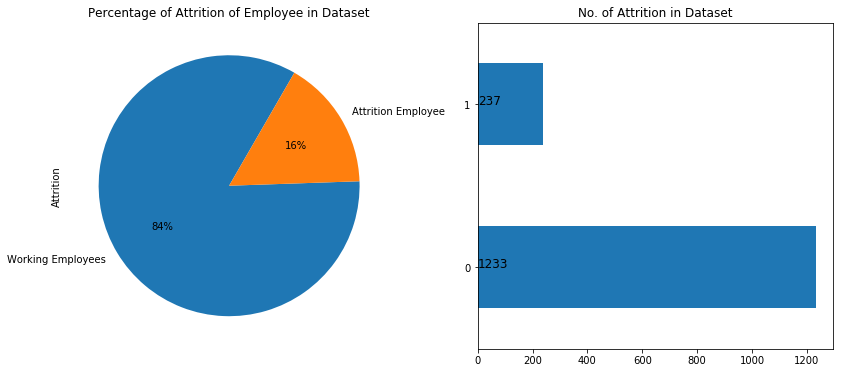

In [10]:
# Plotting attrition of employees
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['Attrition'].value_counts().plot.pie( x="Attrition" ,y ='no.of employees', 
                   autopct = "%1.0f%%",labels=["Working Employees","Attrition Employee"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Attrition of Employee in Dataset')

ax2 = df["Attrition"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["Attrition"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Attrition in Dataset')
plt.show()

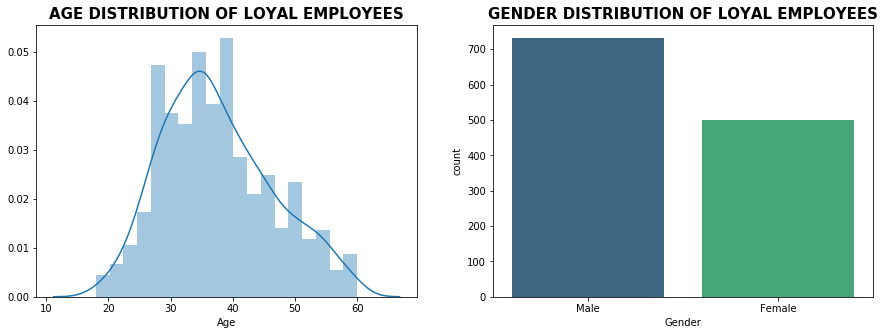

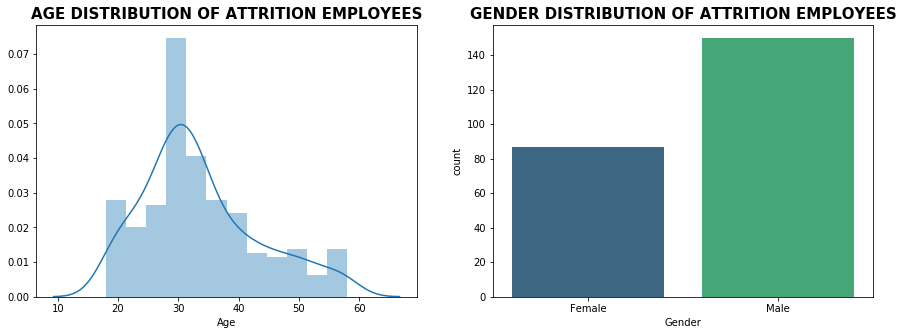

In [11]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['Age'])
plt.title('AGE DISTRIBUTION OF LOYAL EMPLOYEES', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['Gender'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF LOYAL EMPLOYEES', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['Age'])
plt.title('AGE DISTRIBUTION OF ATTRITION EMPLOYEES', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['Gender'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF ATTRITION EMPLOYEES', fontsize=15, weight='bold' )
plt.show()

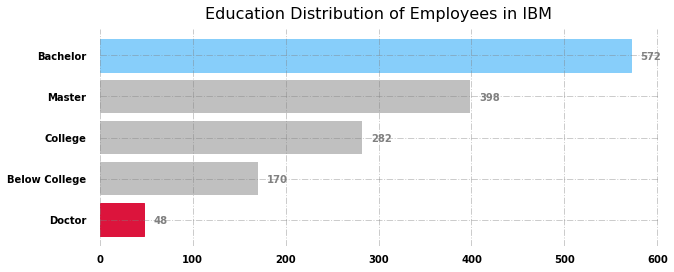

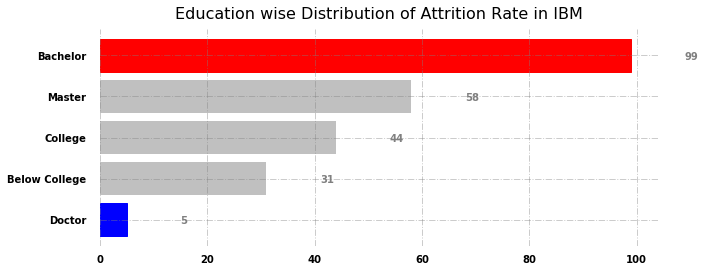

In [12]:
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=df.Education.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('lightskyblue')
mn[4].set_color('crimson')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Education Distribution of Employees in IBM',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

attr_1=df[df['Attrition']==1]
fig, ax = plt.subplots(figsize=(10,4))

# Horizontal Bar Plot
title_cnt=attr_1.Education.value_counts().sort_values(ascending=False).reset_index()
mn= ax.barh(title_cnt.iloc[:,0], title_cnt.iloc[:,1], color='silver')
mn[0].set_color('red')
mn[4].set_color('blue')


# Remove axes splines
for s in ['top','bottom','left','right']:
    ax.spines[s].set_visible(False)

# Remove x,y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x,y gridlines
ax.grid(b=True, color='grey', linestyle='-.', linewidth=1, alpha=0.4)

# Show top values 
ax.invert_yaxis()

# Add Plot Title
ax.set_title('Education wise Distribution of Attrition Rate in IBM',
             loc='center', pad=10, fontsize=16)
plt.yticks(weight='bold')


# Add annotation to bars
for i in ax.patches:
    ax.text(i.get_width()+10, i.get_y()+0.5, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
plt.yticks(weight='bold')
plt.xticks(weight='bold')
# Show Plot
plt.show()

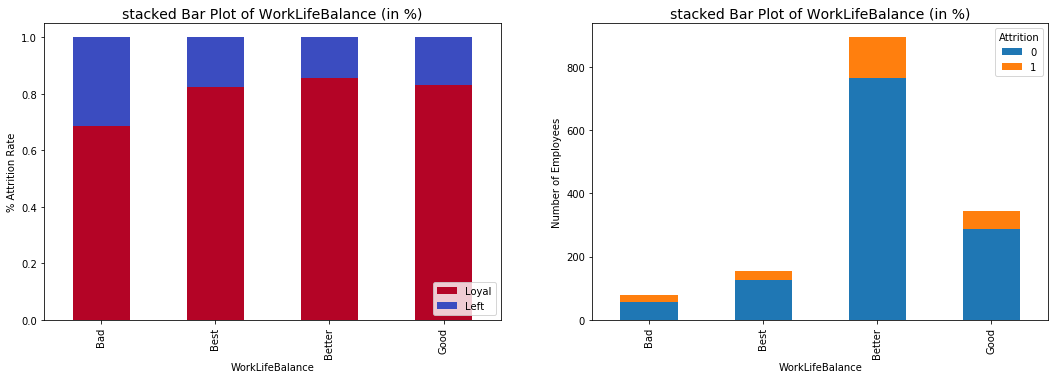

Attrition,0,1
WorkLifeBalance,,
Bad,4.46,10.55
Best,10.22,11.39
Better,62.12,53.59
Good,23.2,24.47


In [13]:
univariate_percent_plot('WorkLifeBalance')
#Exploring the attrition rate based on WorkLifeBalance
plot_criteria= ['WorkLifeBalance', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

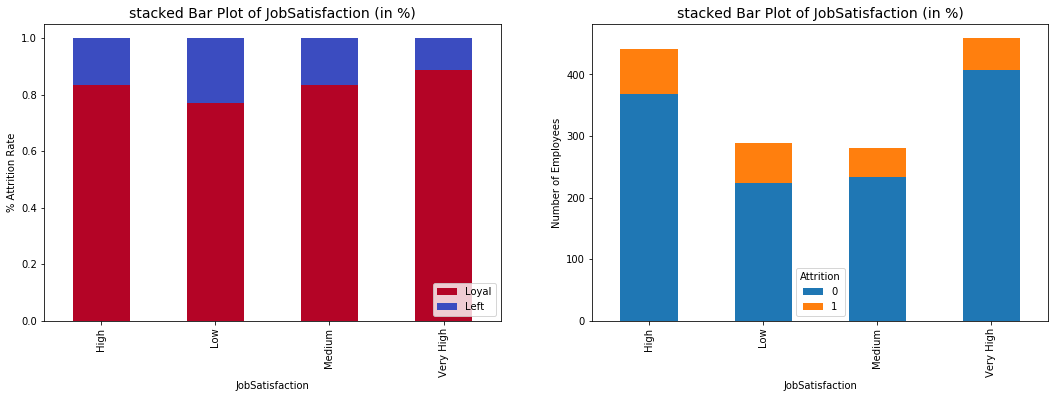

Attrition,0,1
JobSatisfaction,,
High,29.93,30.8
Low,18.09,27.85
Medium,18.98,19.41
Very High,33.01,21.94


In [14]:
univariate_percent_plot('JobSatisfaction')
#Exploring the attrition rate based on JobSatisfaction
plot_criteria= ['JobSatisfaction', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

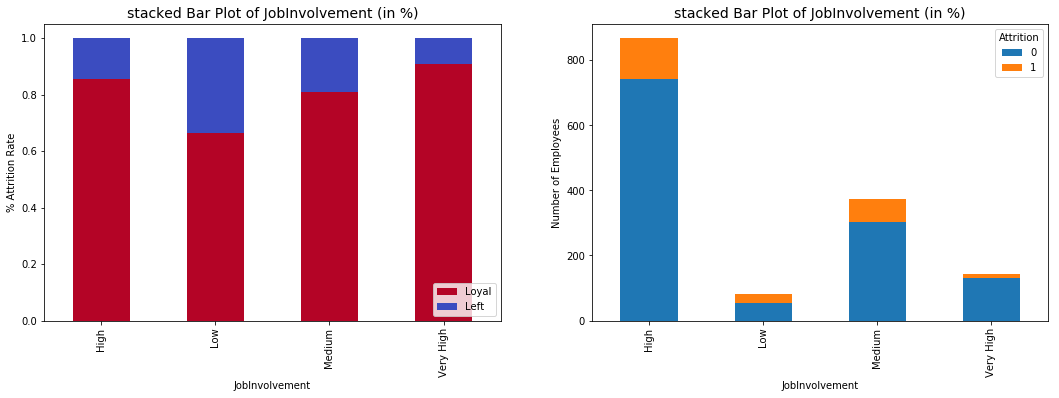

Attrition,0,1
JobInvolvement,,
High,60.26,52.74
Low,4.46,11.81
Medium,24.66,29.96
Very High,10.62,5.49


In [15]:
univariate_percent_plot('JobInvolvement')
#Exploring the attrition rate based on JobInvolvement
plot_criteria= ['JobInvolvement', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


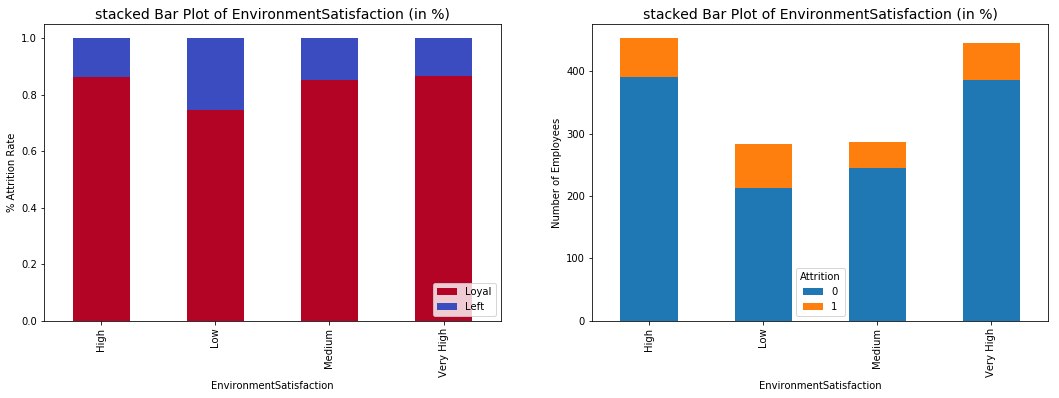

Attrition,0,1
EnvironmentSatisfaction,,
High,31.71,26.16
Low,17.19,30.38
Medium,19.79,18.14
Very High,31.31,25.32


In [16]:
univariate_percent_plot('EnvironmentSatisfaction')
#Exploring the attrition rate based on EnvironmentSatisfaction
plot_criteria= ['EnvironmentSatisfaction', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


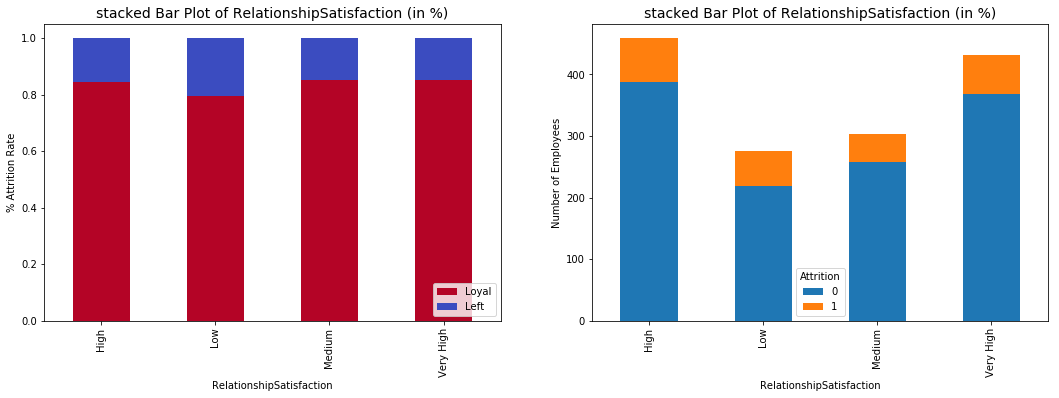

Attrition,0,1
RelationshipSatisfaction,,
High,31.47,29.96
Low,17.76,24.05
Medium,20.92,18.99
Very High,29.85,27


In [17]:
univariate_percent_plot('RelationshipSatisfaction')
#Exploring the attrition rate based on RelationshipSatisfaction
plot_criteria= ['RelationshipSatisfaction', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


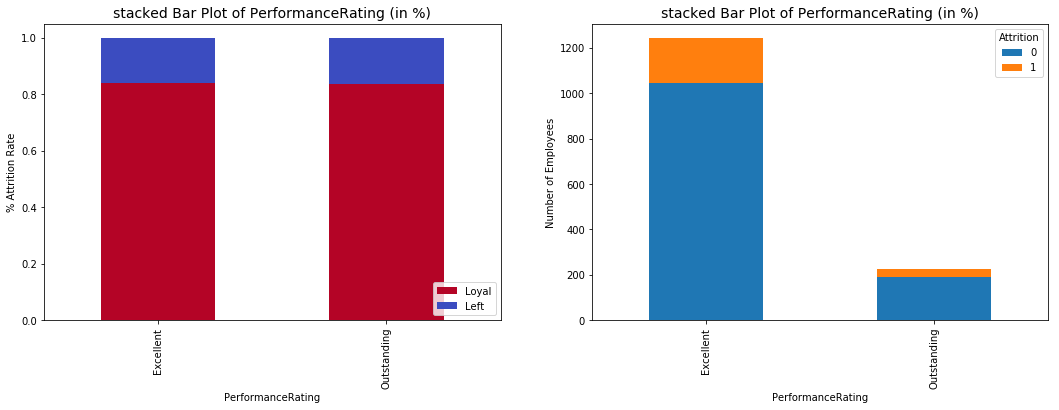

Attrition,0,1
PerformanceRating,,
Excellent,84.67,84.39
Outstanding,15.33,15.61


In [18]:
univariate_percent_plot('PerformanceRating')
#Exploring the attrition rate based on PerformanceRating
plot_criteria= ['PerformanceRating', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


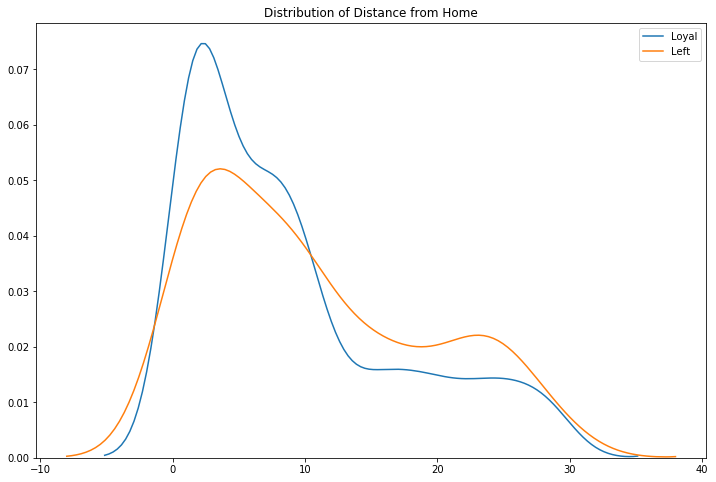

In [19]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['DistanceFromHome']],label="Loyal", hist=False)
sns.distplot(attr_1[['DistanceFromHome']],label="Left", hist=False)
plt.title('Distribution of Distance from Home')
plt.show()

In [20]:
# binning distance_from_home
def dist_home(n):
    if n <= 10:
        return 'Near'
    elif n > 10 and n <=25:
        return 'Far'
    elif n > 25:
        return 'Very far'
    
    
df['dist_home_bins'] = df['DistanceFromHome'].apply(lambda x: dist_home(x))

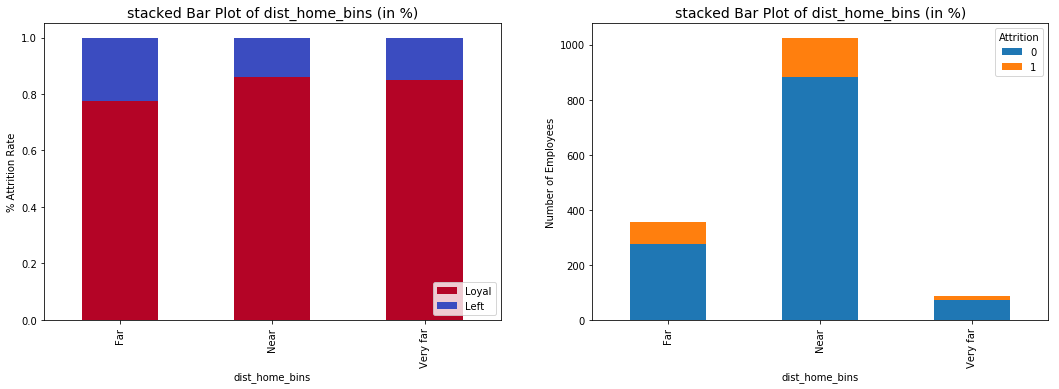

Attrition,0,1
dist_home_bins,,
Far,22.47,33.76
Near,71.53,60.76
Very far,6,5.49


In [21]:
univariate_percent_plot('dist_home_bins')
#Exploring the attrition rate based on dist_home_bins
plot_criteria= ['dist_home_bins', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

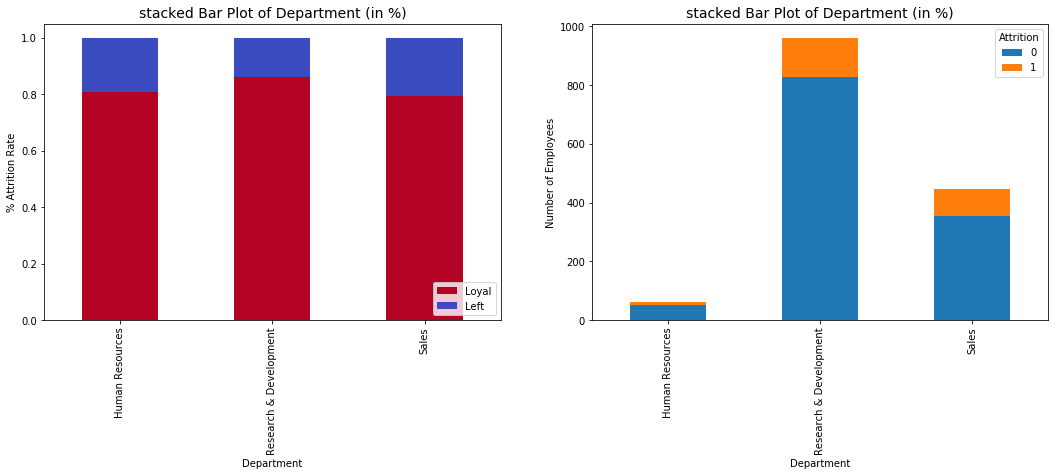

Attrition,0,1
Department,,
Human Resources,4.14,5.06
Research & Development,67.15,56.12
Sales,28.71,38.82


In [22]:
univariate_percent_plot('Department')
#Exploring the attrition rate based on Department
plot_criteria= ['Department', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

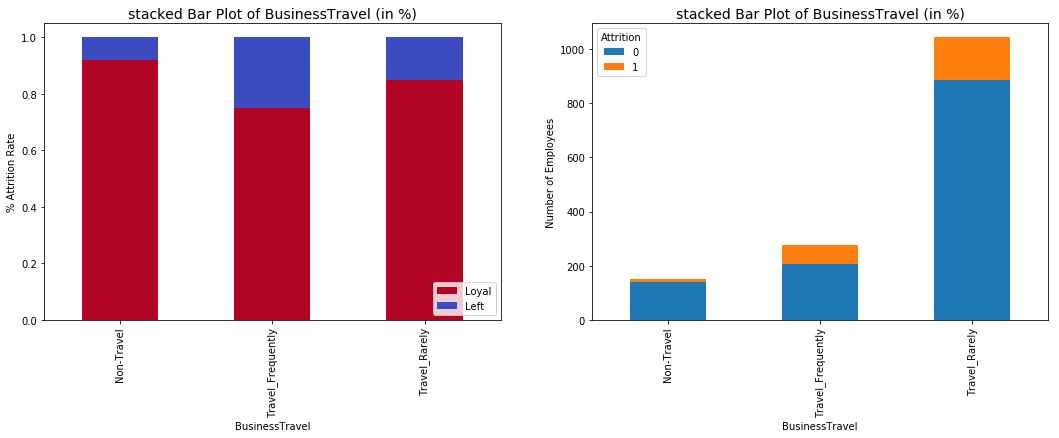

Attrition,0,1
BusinessTravel,,
Non-Travel,11.19,5.06
Travel_Frequently,16.87,29.11
Travel_Rarely,71.94,65.82


In [23]:
univariate_percent_plot('BusinessTravel')
#Exploring the attrition rate based on BusinessTravel
plot_criteria= ['BusinessTravel', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

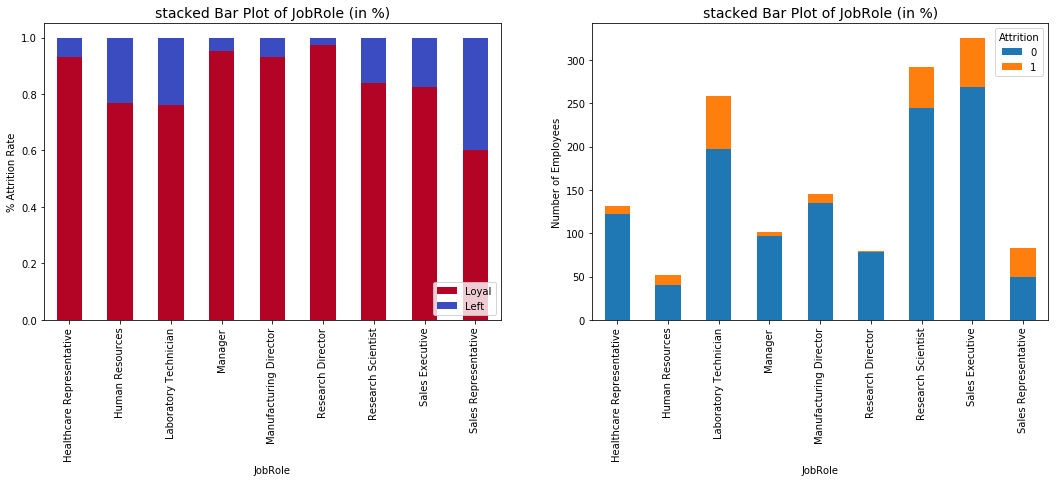

Attrition,0,1
JobRole,,
Healthcare Representative,9.89,3.8
Human Resources,3.24,5.06
Laboratory Technician,15.98,26.16
Manager,7.87,2.11
Manufacturing Director,10.95,4.22
Research Director,6.33,0.84
Research Scientist,19.87,19.83
Sales Executive,21.82,24.05
Sales Representative,4.06,13.92


In [24]:
univariate_percent_plot('JobRole')
#Exploring the attrition rate based on JobRole
plot_criteria= ['JobRole', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

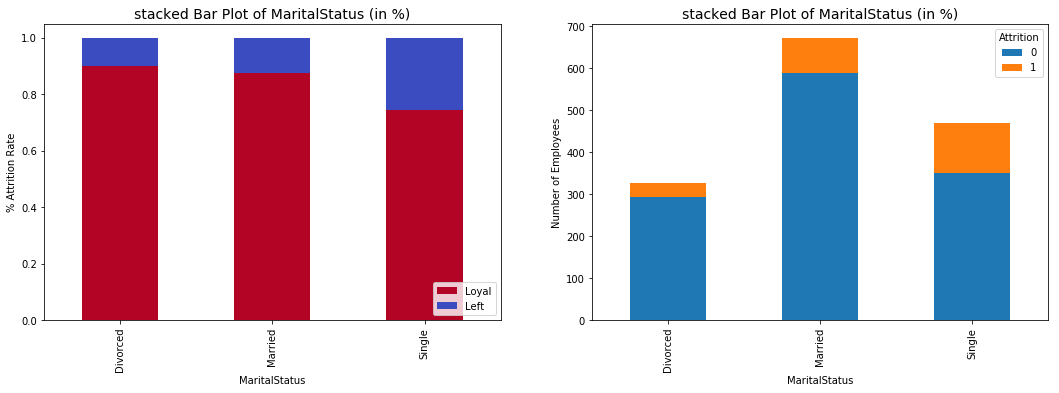

Attrition,0,1
MaritalStatus,,
Divorced,23.84,13.92
Married,47.77,35.44
Single,28.39,50.63


In [25]:
univariate_percent_plot('MaritalStatus')
#Exploring the attrition rate based on MaritalStatus
plot_criteria= ['MaritalStatus', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

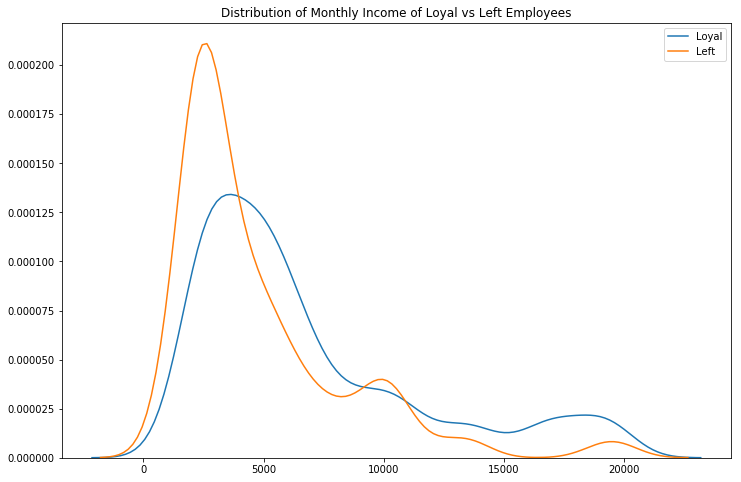

In [26]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['MonthlyIncome']],label="Loyal", hist=False)
sns.distplot(attr_1[['MonthlyIncome']],label="Left", hist=False)
plt.title('Distribution of Monthly Income of Loyal vs Left Employees')
plt.show()

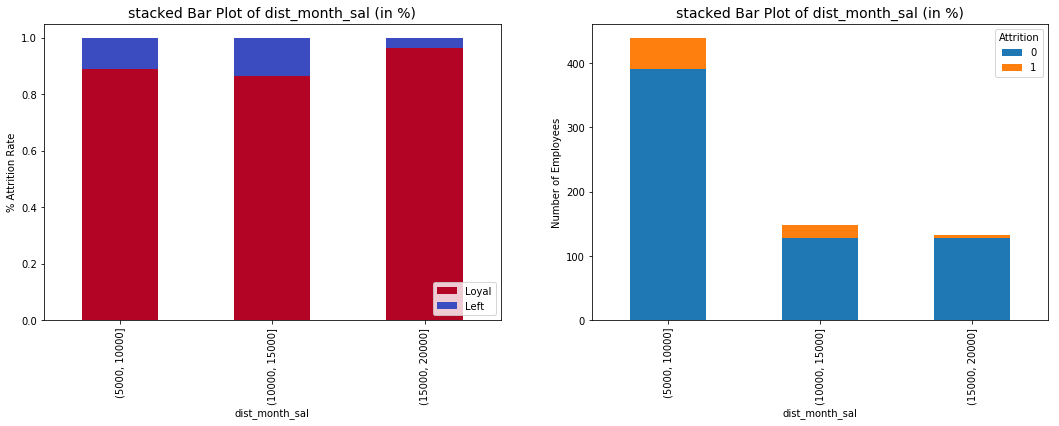

Attrition,0,1
dist_month_sal,,
"(5000, 10000]",60.43,66.22
"(10000, 15000]",19.78,27.03
"(15000, 20000]",19.78,6.76


In [27]:
# binning total monthly_sal
bins = [5000, 10000, 15000, 20000]
df['dist_month_sal'] = pd.cut(df['MonthlyIncome'], bins)

univariate_percent_plot('dist_month_sal')
#Exploring the attrition rate based on dist_work_years
plot_criteria= ['dist_month_sal', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


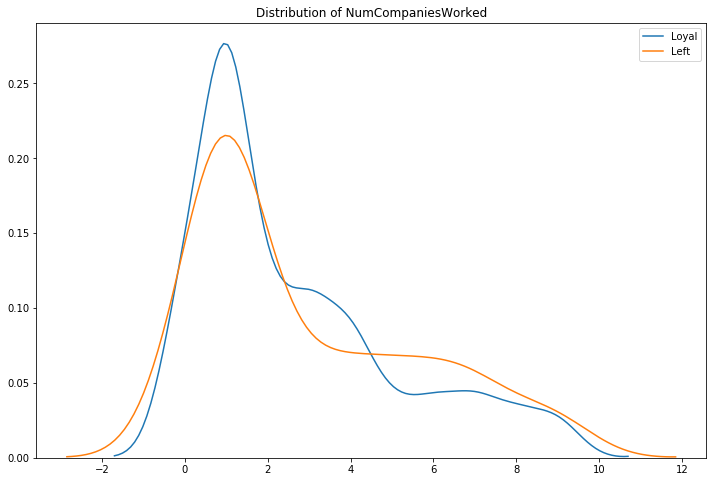

In [28]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['NumCompaniesWorked']],label="Loyal", hist=False)
sns.distplot(attr_1[['NumCompaniesWorked']],label="Left", hist=False)
plt.title('Distribution of NumCompaniesWorked')
plt.show()

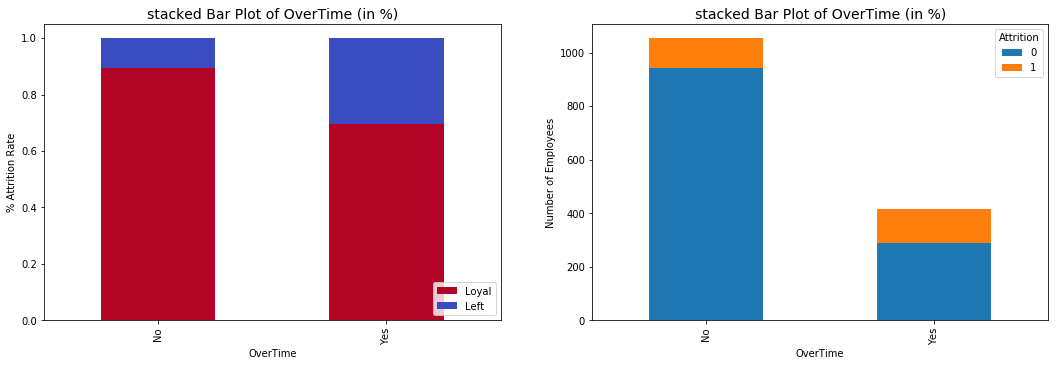

Attrition,0,1
OverTime,,
No,76.56,46.41
Yes,23.44,53.59


In [29]:
univariate_percent_plot('OverTime')
#Exploring the attrition rate based on OverTime
plot_criteria= ['OverTime', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

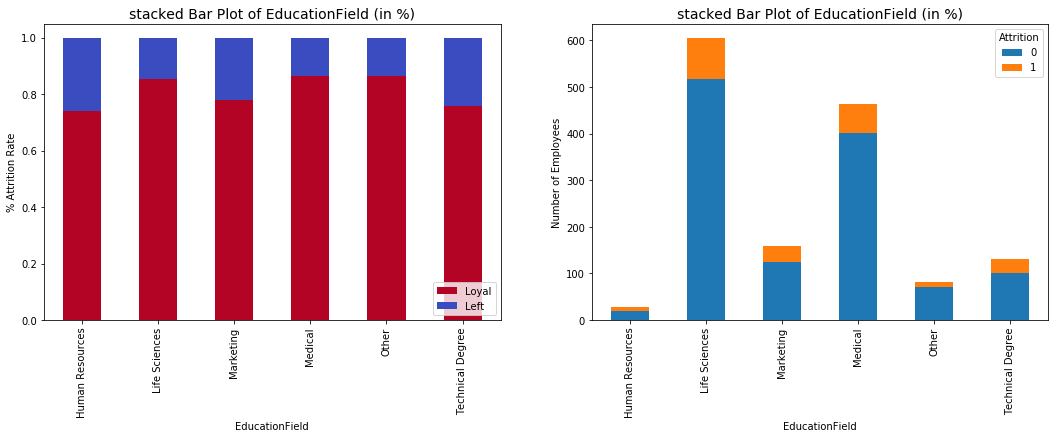

Attrition,0,1
EducationField,,
Human Resources,1.62,2.95
Life Sciences,41.93,37.55
Marketing,10.06,14.77
Medical,32.52,26.58
Other,5.76,4.64
Technical Degree,8.11,13.5


In [30]:

univariate_percent_plot('EducationField')
#Exploring the attrition rate based on EducationField
plot_criteria= ['EducationField', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

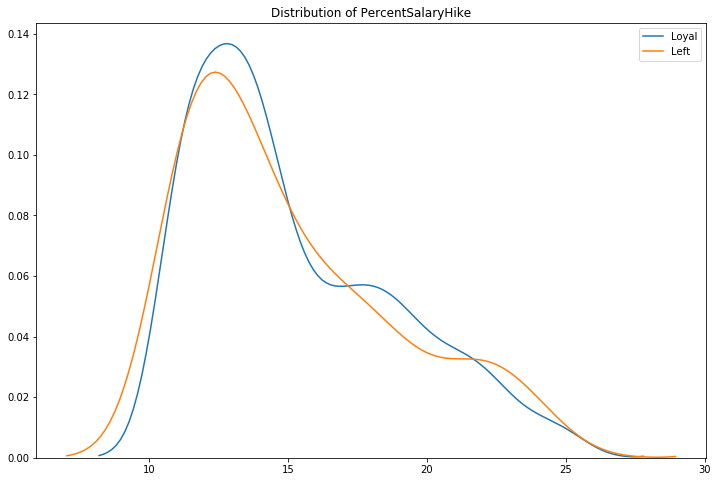

In [31]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['PercentSalaryHike']],label="Loyal", hist=False)
sns.distplot(attr_1[['PercentSalaryHike']],label="Left", hist=False)
plt.title('Distribution of PercentSalaryHike')
plt.show()

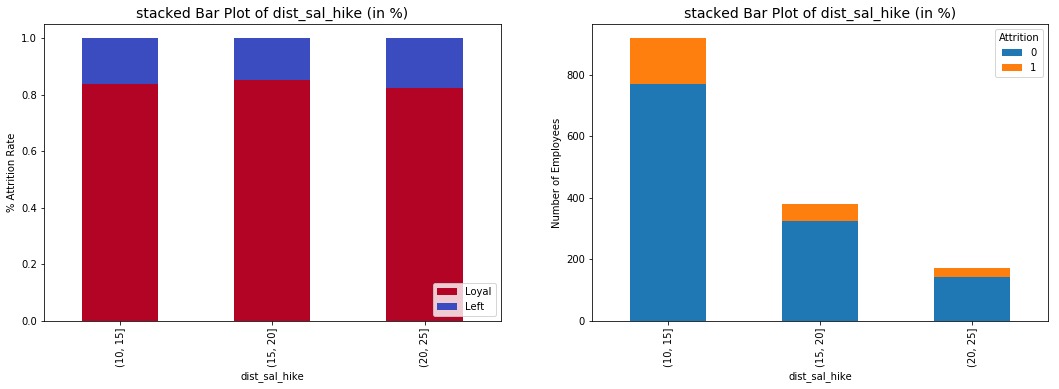

Attrition,0,1
dist_sal_hike,,
"(10, 15]",62.37,63.29
"(15, 20]",26.2,24.05
"(20, 25]",11.44,12.66


In [32]:
# binning %salary hike
bins = [10, 15, 20, 25]
df['dist_sal_hike'] = pd.cut(df['PercentSalaryHike'], bins)

univariate_percent_plot('dist_sal_hike')
#Exploring the attrition rate based on dist_work_years
plot_criteria= ['dist_sal_hike', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


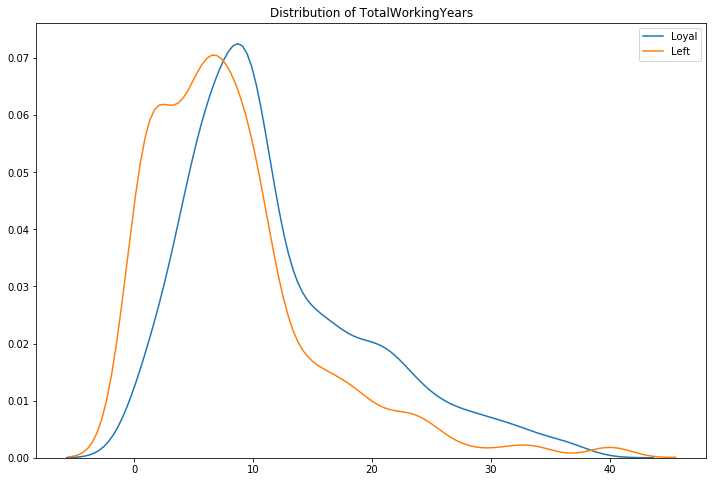

In [33]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['TotalWorkingYears']],label="Loyal", hist=False)
sns.distplot(attr_1[['TotalWorkingYears']],label="Left", hist=False)
plt.title('Distribution of TotalWorkingYears')
plt.show()



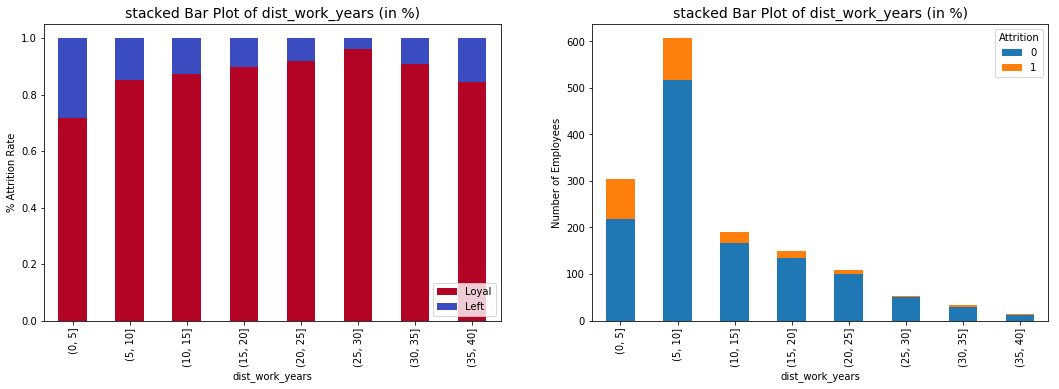

Attrition,0,1
dist_work_years,,
"(0, 5]",17.85,37.07
"(5, 10]",42.05,39.22
"(10, 15]",13.61,10.34
"(15, 20]",10.92,6.47
"(20, 25]",8.15,3.88
"(25, 30]",4.07,0.86
"(30, 35]",2.44,1.29
"(35, 40]",0.9,0.86


In [34]:
# binning total working years
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40]
df['dist_work_years'] = pd.cut(df['TotalWorkingYears'], bins)

univariate_percent_plot('dist_work_years')
#Exploring the attrition rate based on dist_work_years
plot_criteria= ['dist_work_years', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


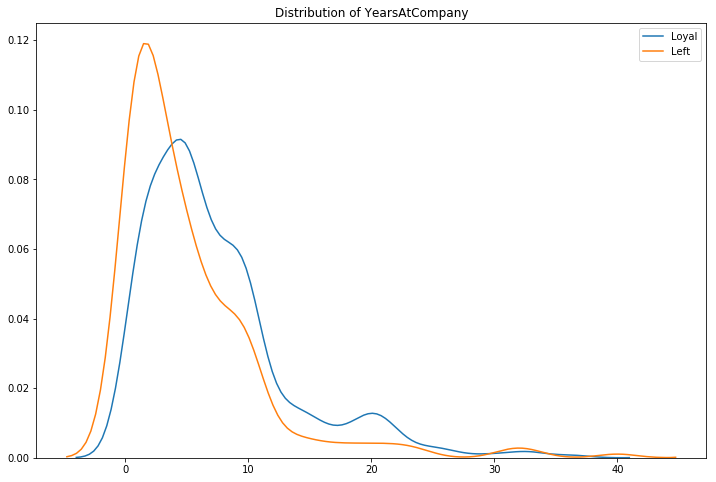

In [35]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['YearsAtCompany']],label="Loyal", hist=False)
sns.distplot(attr_1[['YearsAtCompany']],label="Left", hist=False)
plt.title('Distribution of YearsAtCompany')
plt.show()

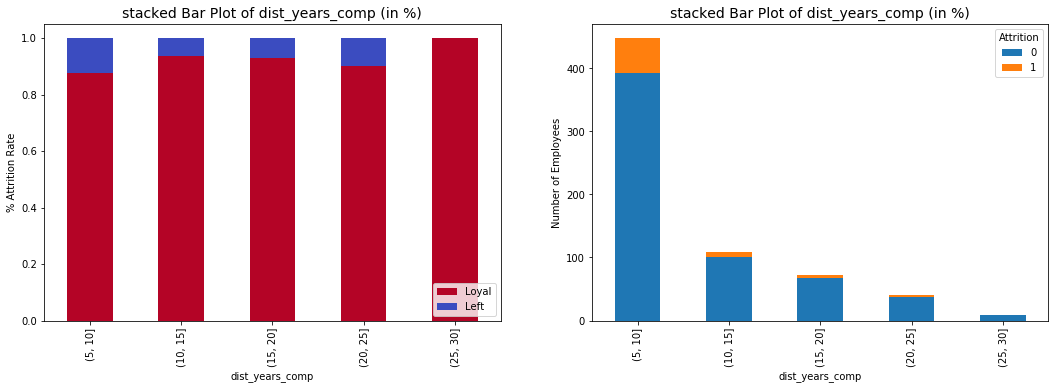

Attrition,0,1
dist_years_comp,,
"(5, 10]",64.74,77.46
"(10, 15]",16.64,9.86
"(15, 20]",11.04,7.04
"(20, 25]",6.1,5.63
"(25, 30]",1.48,0


In [36]:
# binning total working years
bins = [5, 10, 15, 20, 25, 30]
df['dist_years_comp'] = pd.cut(df['YearsAtCompany'], bins)

univariate_percent_plot('dist_years_comp')
#Exploring the attrition rate based on dist_work_years
plot_criteria= ['dist_years_comp', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


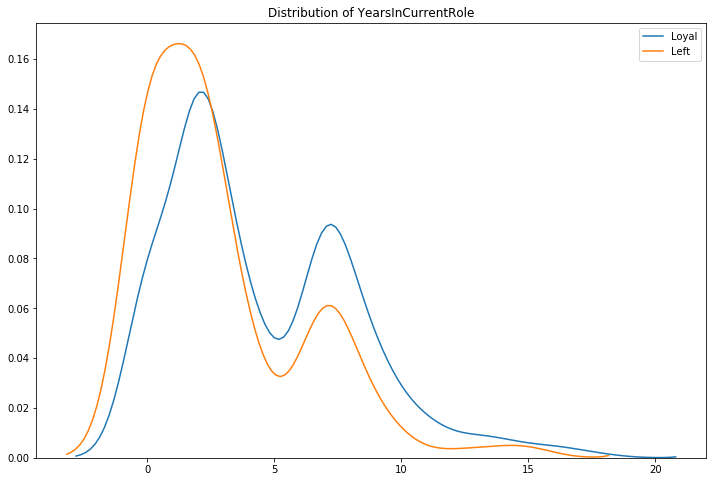

In [37]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['YearsInCurrentRole']],label="Loyal", hist=False)
sns.distplot(attr_1[['YearsInCurrentRole']],label="Left", hist=False)
plt.title('Distribution of YearsInCurrentRole')
plt.show()

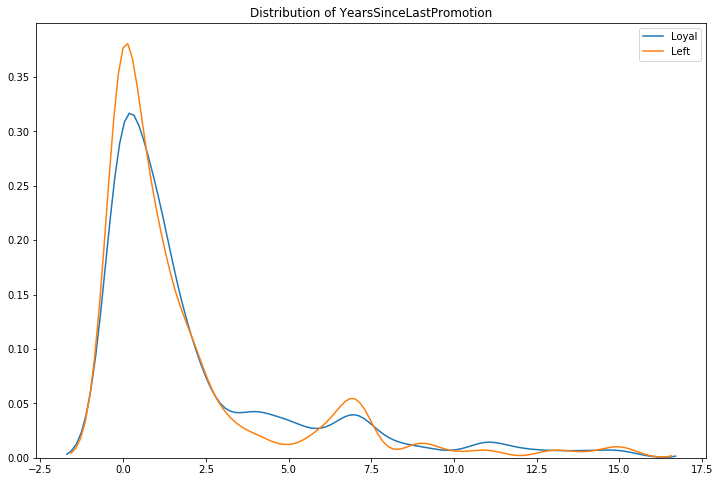

In [38]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['YearsSinceLastPromotion']],label="Loyal", hist=False)
sns.distplot(attr_1[['YearsSinceLastPromotion']],label="Left", hist=False)
plt.title('Distribution of YearsSinceLastPromotion')
plt.show()

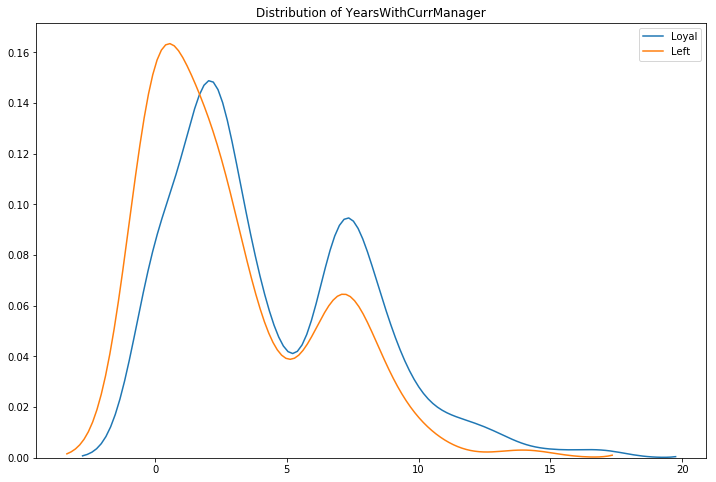

In [39]:
fig = plt.figure(figsize=(12,8))
sns.distplot(attr_0[['YearsWithCurrManager']],label="Loyal", hist=False)
sns.distplot(attr_1[['YearsWithCurrManager']],label="Left", hist=False)
plt.title('Distribution of YearsWithCurrManager')
plt.show()

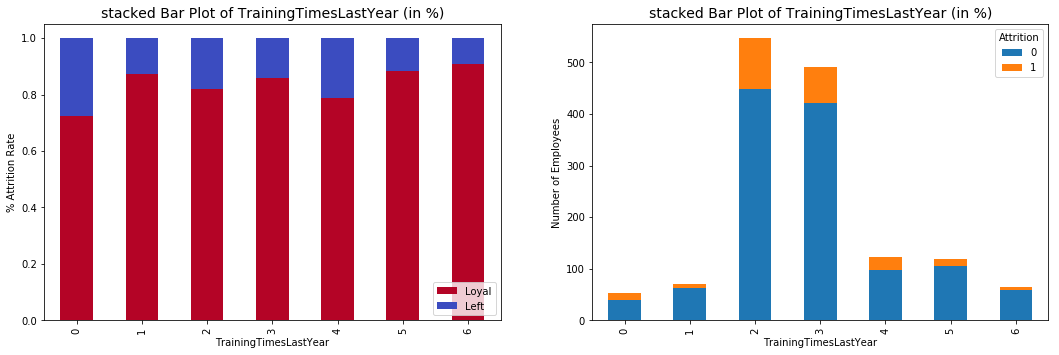

Attrition,0,1
TrainingTimesLastYear,,
0,3.16,6.33
1,5.03,3.8
2,36.42,41.35
3,34.23,29.11
4,7.87,10.97
5,8.52,5.91
6,4.79,2.53


In [40]:
univariate_percent_plot('TrainingTimesLastYear')
#Exploring the attrition rate based on TrainingTimesLastYear
plot_criteria= ['TrainingTimesLastYear', 'Attrition']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

##  Segmented Univariate Analysis

In [41]:
df.groupby('Gender')['Attrition'].mean().sort_values(ascending=False)

Gender
Male      0.170068
Female    0.147959
Name: Attrition, dtype: float64

In [42]:
# defining a function which takes a categorical variable and plots the Attrition rate
# segmented by Gender 
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y="Attrition", hue="Gender", data=df)
    plt.show()

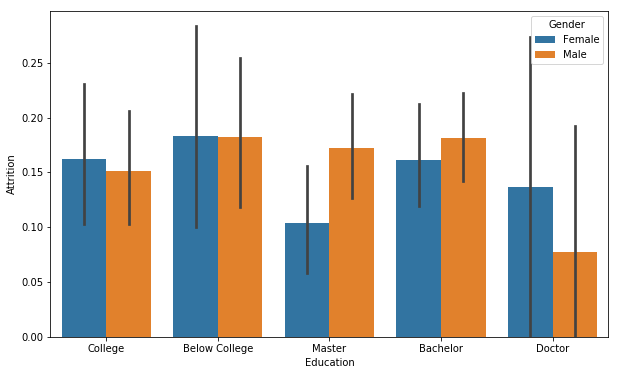

In [43]:
# Education: segmented by Gender
plot_segmented('Education')

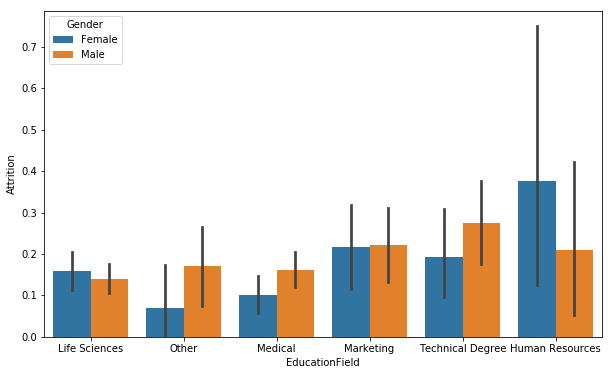

In [44]:
# EducationField: segmented by Gender
plot_segmented('EducationField')

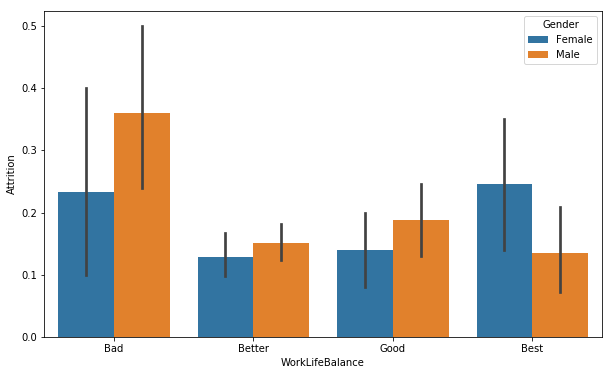

In [45]:
# WorkLifeBalance: segmented by Gender
plot_segmented('WorkLifeBalance')

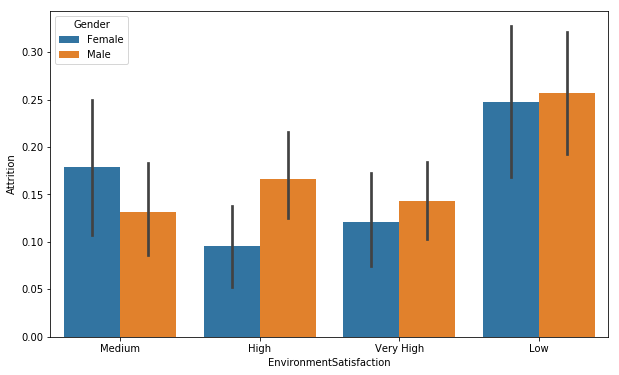

In [46]:
# EnvironmentSatisfaction: segmented by Gender
plot_segmented('EnvironmentSatisfaction')

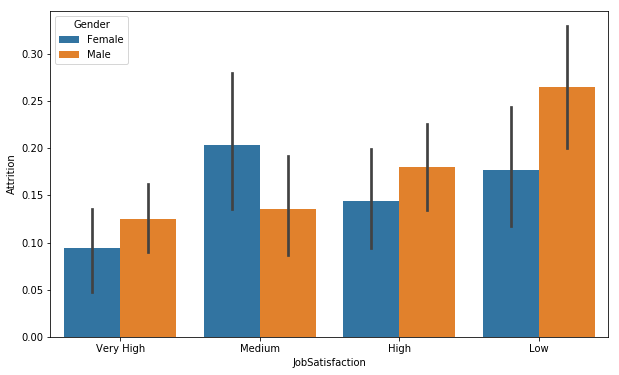

In [47]:
# JobSatisfaction: segmented by Gender
plot_segmented('JobSatisfaction')

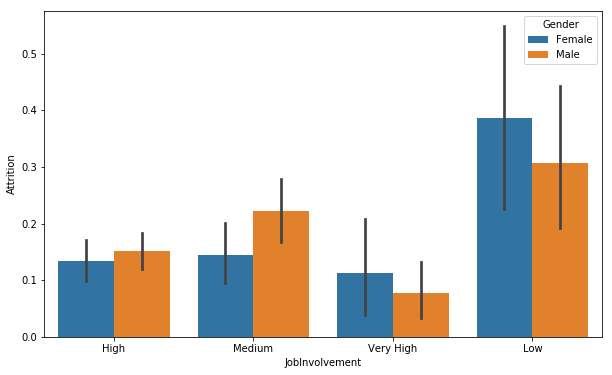

In [48]:
# JobInvolvement: segmented by Gender
plot_segmented('JobInvolvement')

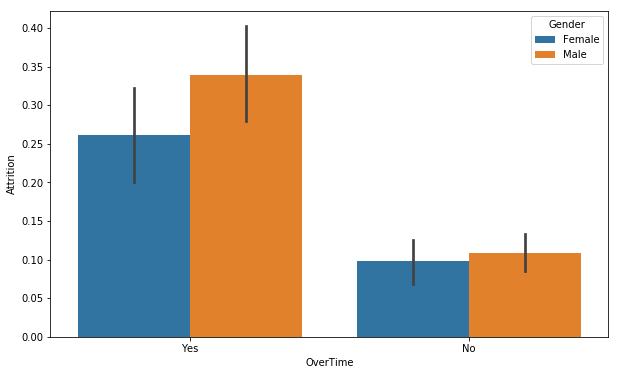

In [49]:
# OverTime: segmented by Gender
plot_segmented('OverTime')

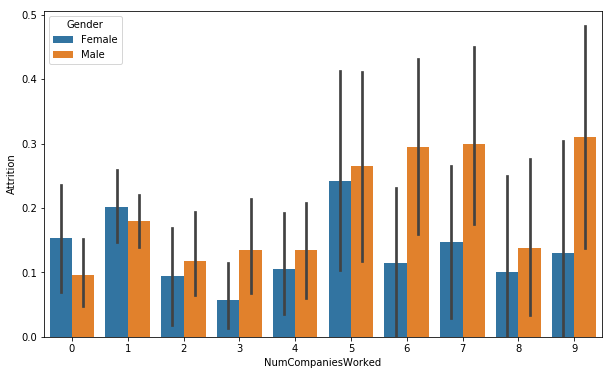

In [50]:
# BusinessTravel: segmented by Gender
plot_segmented('NumCompaniesWorked')

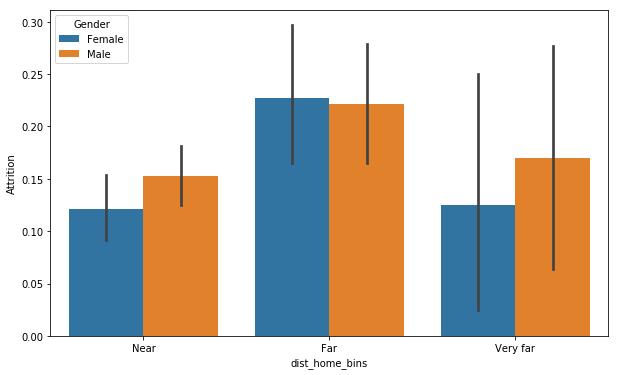

In [51]:
# Distance from Home: segmented by Gender
plot_segmented('dist_home_bins')

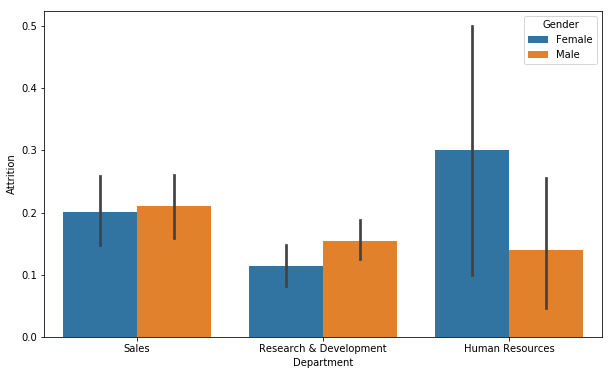

In [52]:
# Department: segmented by Gender
plot_segmented('Department')

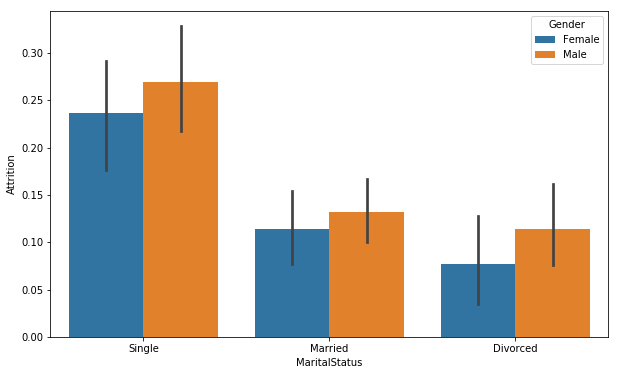

In [53]:
# MaritalStatus: segmented by Gender
plot_segmented('MaritalStatus')

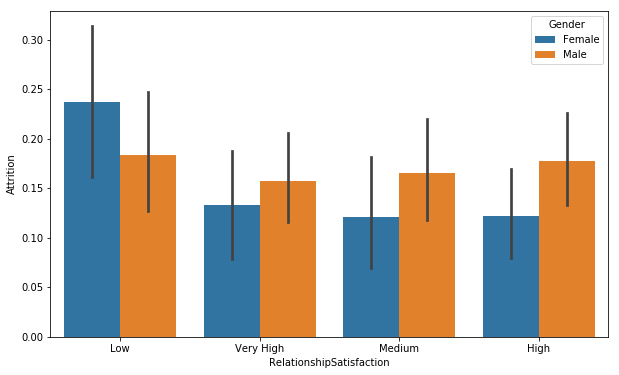

In [54]:
# RelationshipSatisfaction: segmented by Gender
plot_segmented('RelationshipSatisfaction')

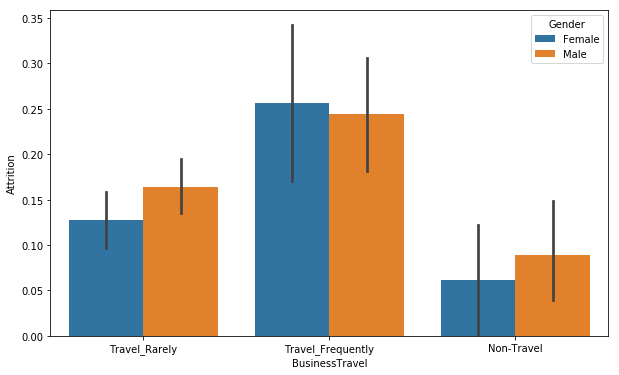

In [55]:
# BusinessTravel: segmented by Gender
plot_segmented('BusinessTravel')

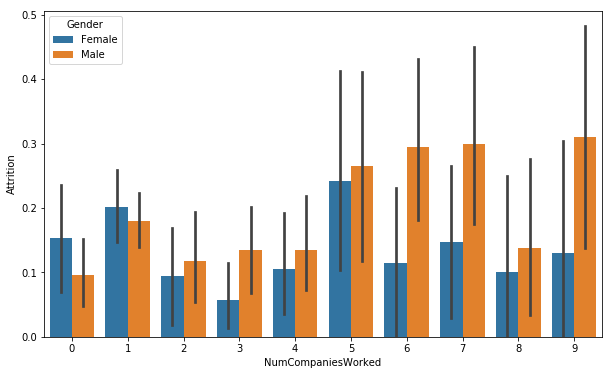

In [56]:
# NumCompaniesWorked: segmented by Gender
plot_segmented('NumCompaniesWorked')

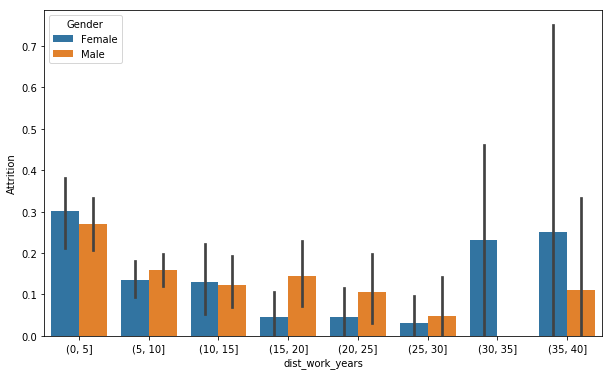

In [57]:
# dist_work_years: segmented by Gender
plot_segmented('dist_work_years')

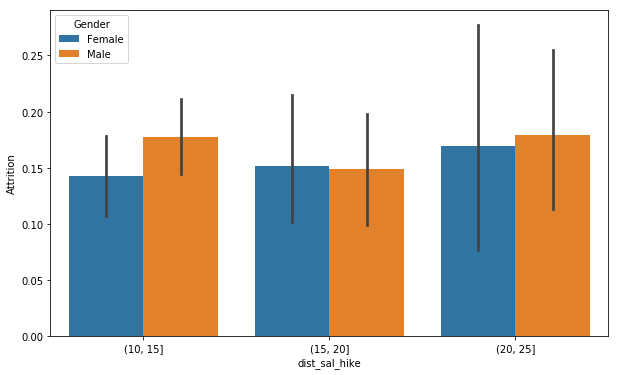

In [58]:
# dist_sal_hike: segmented by Gender
plot_segmented('dist_sal_hike')

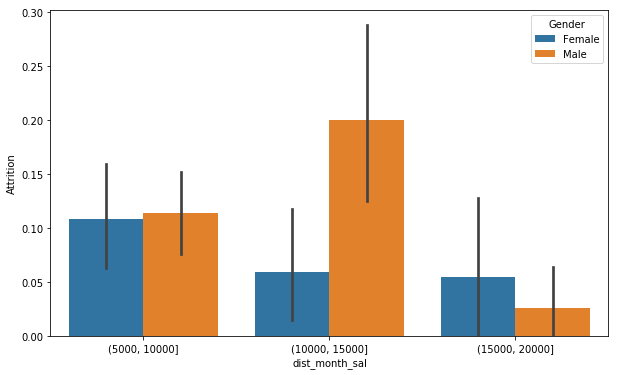

In [59]:
# dist_month_sal: segmented by Gender
plot_segmented('dist_month_sal')

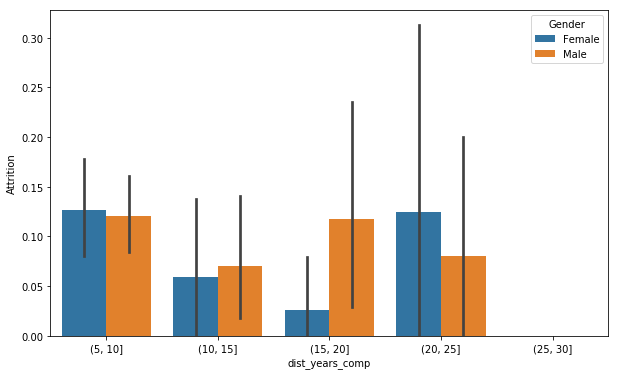

In [60]:
# dist_years_comp: segmented by Gender
plot_segmented('dist_years_comp')

Text(0, 0.5, 'Monthly Income in US$')

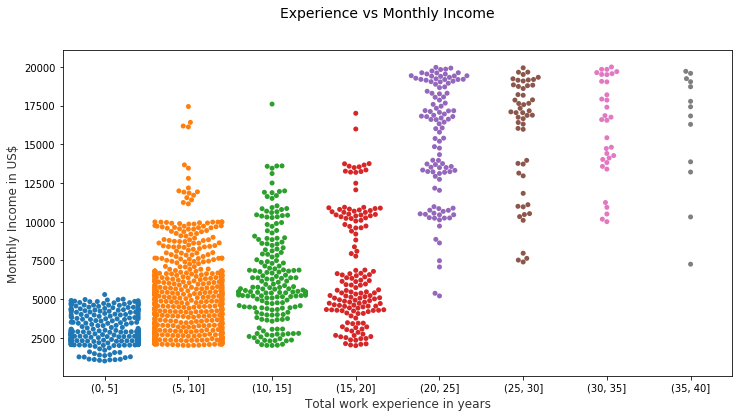

In [61]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Experience vs Monthly Income', fontsize=14)

sns.swarmplot(x="dist_work_years", y="MonthlyIncome", data=df,  ax=ax)
ax.set_xlabel("Total work experience in years",size = 12,alpha=0.8)
ax.set_ylabel("Monthly Income in US$",size = 12,alpha=0.8)


Text(0, 0.5, 'Monthly Income in US$')

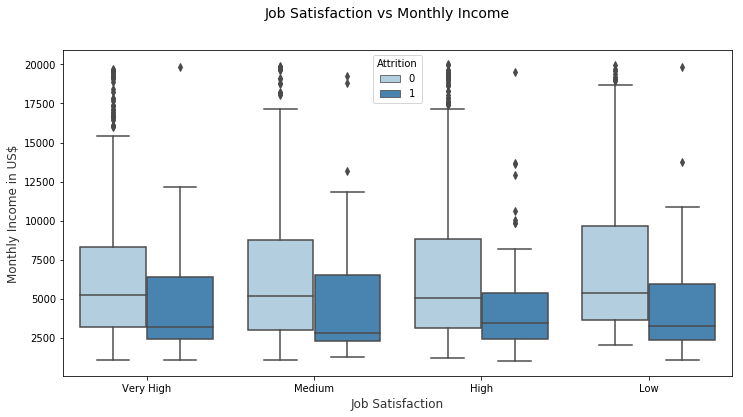

In [62]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Job Satisfaction vs Monthly Income', fontsize=14)

sns.boxplot(x="JobSatisfaction", y="MonthlyIncome",hue='Attrition', data=df,  ax=ax,palette="Blues")
ax.set_xlabel("Job Satisfaction",size = 12,alpha=0.8)
ax.set_ylabel("Monthly Income in US$",size = 12,alpha=0.8)


Text(0, 0.5, 'Monthly Income in US$')

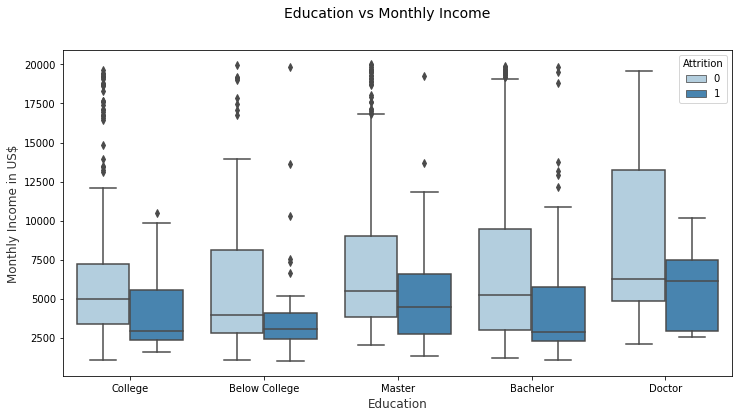

In [63]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Education vs Monthly Income', fontsize=14)

sns.boxplot(x="Education", y="MonthlyIncome",hue='Attrition', data=df,  ax=ax,palette="Blues")
ax.set_xlabel("Education",size = 12,alpha=0.8)
ax.set_ylabel("Monthly Income in US$",size = 12,alpha=0.8)


Text(0, 0.5, 'Monthly Income in US$')

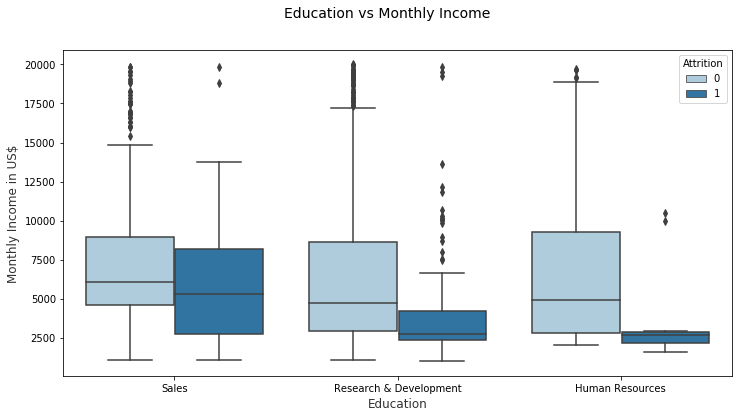

In [64]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('Education vs Monthly Income', fontsize=14)

sns.boxplot(x="Department", y="MonthlyIncome",hue='Attrition', data=df,  ax=ax,palette="Paired")
ax.set_xlabel("Education",size = 12,alpha=0.8)
ax.set_ylabel("Monthly Income in US$",size = 12,alpha=0.8)


Text(0, 0.5, 'DistanceFromHome')

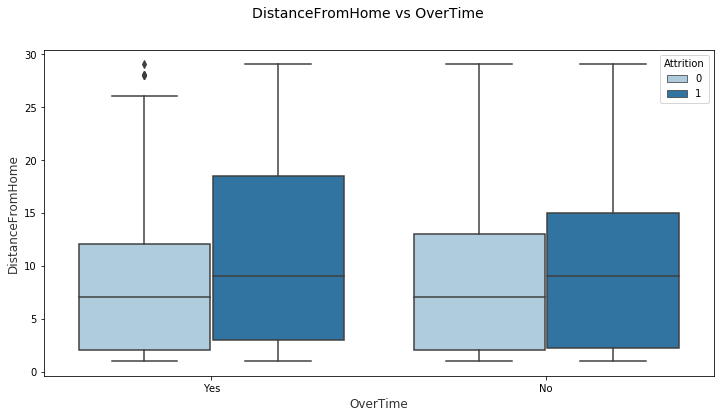

In [65]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('DistanceFromHome vs OverTime', fontsize=14)

sns.boxplot(x="OverTime", y="DistanceFromHome",hue='Attrition', data=df,  ax=ax,palette="Paired")
ax.set_xlabel("OverTime",size = 12,alpha=0.8)
ax.set_ylabel("DistanceFromHome",size = 12,alpha=0.8)


Text(0, 0.5, 'PercentSalaryHike')

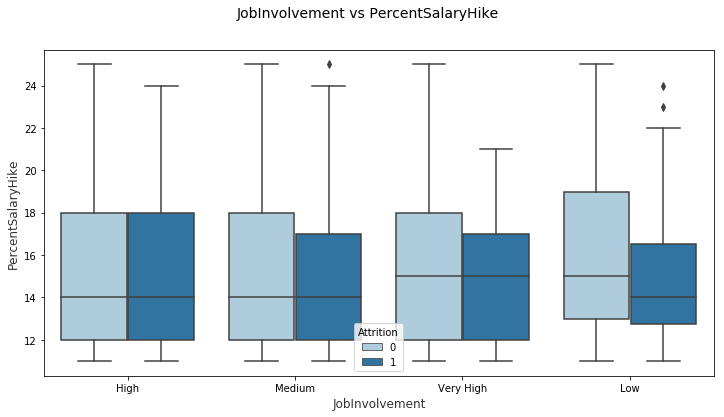

In [66]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('JobInvolvement vs PercentSalaryHike', fontsize=14)

sns.boxplot(x="JobInvolvement", y="PercentSalaryHike",hue='Attrition', data=df,  ax=ax,palette="Paired")
ax.set_xlabel("JobInvolvement",size = 12,alpha=0.8)
ax.set_ylabel("PercentSalaryHike",size = 12,alpha=0.8)


Text(0, 0.5, 'PercentSalaryHike')

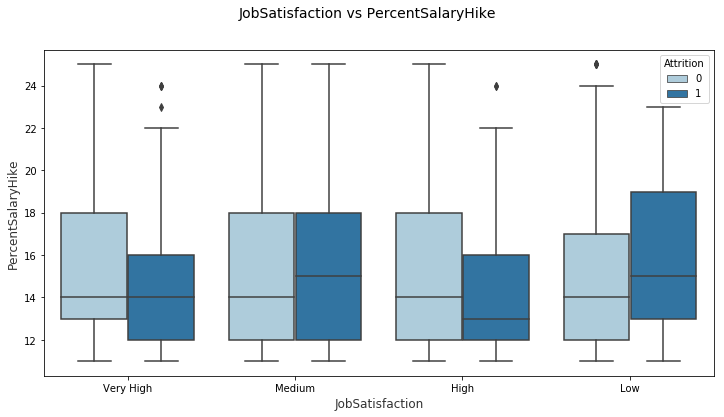

In [67]:
# Violin Plots
f, (ax) = plt.subplots(1, 1, figsize=(12, 6))
f.suptitle('JobSatisfaction vs PercentSalaryHike', fontsize=14)

sns.boxplot(x="JobSatisfaction", y="PercentSalaryHike",hue='Attrition', data=df,  ax=ax,palette="Paired")
ax.set_xlabel("JobSatisfaction",size = 12,alpha=0.8)
ax.set_ylabel("PercentSalaryHike",size = 12,alpha=0.8)
